# O que são arquivos de áudio?

Muitos de nós já estamos acostumados com a representação de uma onda sonora como uma sequência de "picos e vales":

![](resources/audio.jpg)

Esses picos e vales são formados pelo som "batendo" contra o captador de um microfone:

![](resources/mic.png)

Em sua essência, um arquivo de áudio nada mais é do que um **vetor numérico** (lista de números). Cada número representa um pico ou vale capturado pelo microfone. O microfone captura cada um dos picos/vales **milhares de vezes por segundo**, e sua intensidade vira um número no vetor:

<img src="resources/wave.png" width="600"/>

O número de vezes com que o som é capturado a cada segundo é chamado de taxa de amostragem (*sampling rate*). Falaremos mais sobre ele em seguida.

## Porque um vetor?

Dentro do computador (e especialmente quando falamos de IA e Machine Learning), muitos tipos de dados diferentes como áudio, imagens, vídeos, texto, ... São representados como vetores. Na realidade, este é o motivo pelo qual é possível criar modelos de IA que "convertem" as informações que passamos para eles, como os modelos text-to-speech.

Para visualizar um arquivo de áudio, vamos usar os dados do seguinte Dataset do Hugging Face: https://huggingface.co/datasets/ashraq/esc50

## Carregando o Dataset e exibindo seus dados

In [1]:
from datasets import load_dataset

dataset = load_dataset('ashraq/esc50')
dataset

Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['filename', 'fold', 'target', 'category', 'esc10', 'src_file', 'take', 'audio'],
        num_rows: 2000
    })
})

### Selecionando e exibindo linhas

In [2]:
dados = dataset['train']
primeira_linha = dados[0]
primeira_linha

{'filename': '1-100032-A-0.wav',
 'fold': 1,
 'target': 0,
 'category': 'dog',
 'esc10': True,
 'src_file': 100032,
 'take': 'A',
 'audio': {'path': None,
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 44100}}

In [3]:
primeiras_linhas = dados.select(range(10))
for linha in primeiras_linhas:
    print(linha)
    print('-----')

{'filename': '1-100032-A-0.wav', 'fold': 1, 'target': 0, 'category': 'dog', 'esc10': True, 'src_file': 100032, 'take': 'A', 'audio': {'path': None, 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 44100}}
-----
{'filename': '1-100038-A-14.wav', 'fold': 1, 'target': 14, 'category': 'chirping_birds', 'esc10': False, 'src_file': 100038, 'take': 'A', 'audio': {'path': None, 'array': array([-0.01184082, -0.10336304, -0.14141846, ...,  0.06985474,
        0.04049683,  0.00274658]), 'sampling_rate': 44100}}
-----
{'filename': '1-100210-A-36.wav', 'fold': 1, 'target': 36, 'category': 'vacuum_cleaner', 'esc10': False, 'src_file': 100210, 'take': 'A', 'audio': {'path': None, 'array': array([-0.00695801, -0.01251221, -0.01126099, ...,  0.215271  ,
       -0.00875854, -0.28903198]), 'sampling_rate': 44100}}
-----
{'filename': '1-100210-B-36.wav', 'fold': 1, 'target': 36, 'category': 'vacuum_cleaner', 'esc10': False, 'src_file': 100210, 'take': 'B', 'audio': {'path': None, 'array': a

## Visualizando um áudio

Quantidade de dados: (220500,)


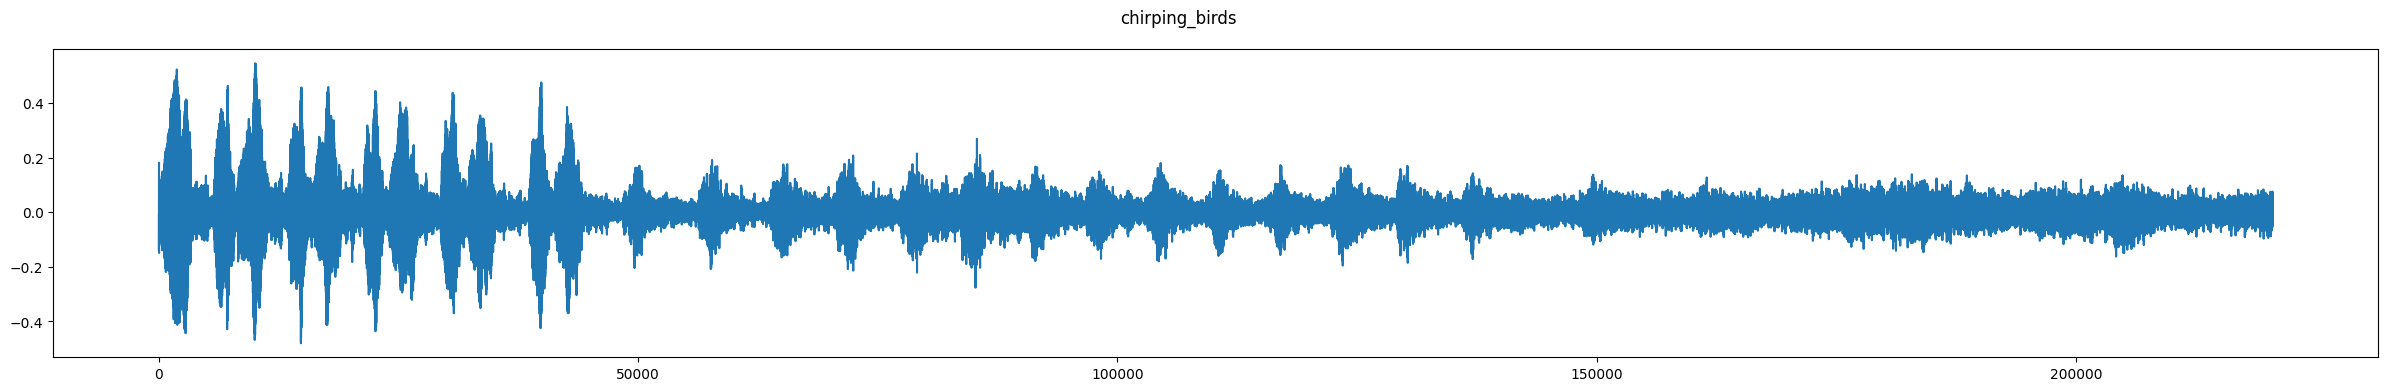

In [4]:
import matplotlib.pyplot as plt

idx_dados = 1
linha = dados[idx_dados]

plt.subplots(figsize=(30, 4))
plt.plot(linha['audio']['array'])
plt.suptitle(linha['category'])

print(f"Quantidade de dados: {linha['audio']['array'].shape}")

plt.show()

## Salvando dados de áudio em arquivos `.wav` 

In [5]:
from pathlib import Path

pasta_saida = Path('audios') / 'objetos'
pasta_saida.mkdir(exist_ok=True)

In [6]:
import IPython
import soundfile

for i, linha in enumerate(primeiras_linhas, 1):
    objeto = linha['category']
    dados_som = linha['audio']['array']
    taxa_amostragem = linha['audio']['sampling_rate']
    caminho_saida = pasta_saida / f'{i:03d}_{objeto}.wav'
    # Salvando em um arquivo de áudio
    soundfile.write(file=caminho_saida, data=dados_som, samplerate=taxa_amostragem)
    # Exibindo no Jupyter Notebook
    display(IPython.display.Audio(data=dados_som, rate=taxa_amostragem))

# O que é "sampling rate" (taxa de amostragem)?

A taxa de amostragem (em inglês: *sampling rate*) determina quantas vezes por segundo um microfone captura a onda sonora. A unidade de medida é Hertz, ou seja, oscilações por segundo.

Uma taxa de amostragem de 16000 Hz corresponde a um microfone que captura a intensidade da onda sonora 16 mil vezes por segundo!

Em cada captura feita pelo microfone, é gerado um número do vetor que observamos acima. Logo, para sabermos a duração de um áudio, não basta sabermos os números do vetor: **precisamos informar o *sampling rate* para que o arquivo saiba quantas capturas por segundo foram feitas**.

Se passarmos um valor errado de sampling rate, estamos efetivamente acelerando ou desacelerando o áudio!

## Exemplo: escrevendo áudio com sampling rate errado

In [7]:
passaros = primeiras_linhas[1]
soundfile.write(
    pasta_saida / 'passaros_grave.wav',
    passaros["audio"]["array"],
    int(passaros["audio"]["sampling_rate"] / 3),
)

display(IPython.display.Audio(
    data=passaros["audio"]["array"],
    rate=passaros["audio"]["sampling_rate"],
))
display(IPython.display.Audio(
    data=passaros["audio"]["array"], 
    rate=passaros["audio"]["sampling_rate"] / 3,
))

In [8]:
corvos = primeiras_linhas[8]
soundfile.write(
    pasta_saida / 'corvos_agudo.wav',
    corvos["audio"]["array"],
    int(corvos["audio"]["sampling_rate"] * 3),
)

display(IPython.display.Audio(
    data=corvos["audio"]["array"],
    rate=corvos["audio"]["sampling_rate"],
))
display(IPython.display.Audio(
    data=corvos["audio"]["array"],
    rate=corvos["audio"]["sampling_rate"] * 3,
))

## Sampling rate importa?

Sim! Da mesma forma como nós humanos, os modelos de IA podem se confundir caso tenham sido treinados com sampling rate X, mas receberem dados em sampling rate Y.

Por isso, é importante conferir qual sampling rate seu modelo trabalha, e qual o sampling rate dos seus dados, microfone, etc. Caso necessário, ajuste seus dados (exemplo a seguir):

## Ajustando o sampling rate de um Dataset manualmente

In [9]:
from datasets import Audio

sr = dados[0]["audio"]["sampling_rate"]
print(f'Sampling rate original: {sr}')

dados = dados.cast_column("audio", Audio(sampling_rate=48000))

sr = dados[0]["audio"]["sampling_rate"]
print(f'Sampling rate ajustado: {sr}')

Sampling rate original: 44100
Sampling rate ajustado: 48000
